# Trabajo Final Analisis Predictivo_Javier Gilabert Sabater

# Separación de la muestra, validación cruzada, selección de estadísticos de capacidad predictiva

-----

# IMPORTANTE: CAMBIAR NOMBRES TRAIN Y TEST PARA RESERVAS Y CANCELACIONES

# AutoARIMA

## Analisis Serie Reservas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

#obtain hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

In [3]:
df_w_r = pd.read_csv('df_reservas.csv')
df_w_r['ArrivalDate'] = pd.to_datetime(df_w_r['ArrivalDate'])
df_w_r = df_w_r.set_index('ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-08-06,703
2017-08-13,717
2017-08-20,797
2017-08-27,678
2017-09-03,349


In [5]:
log_df_w_r = pd.read_csv('df_reservas_LOG.csv')
log_df_w_r['ArrivalDate'] = pd.to_datetime(log_df_w_r['ArrivalDate'])
log_df_w_r = log_df_w_r.set_index('ArrivalDate')
log_df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-08-06,6.555357
2017-08-13,6.575076
2017-08-20,6.680855
2017-08-27,6.519147
2017-09-03,5.855072


In [9]:
#Dividir el dataset

# Sktime fucntions
# Forecast horizon and Split function 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

110 4


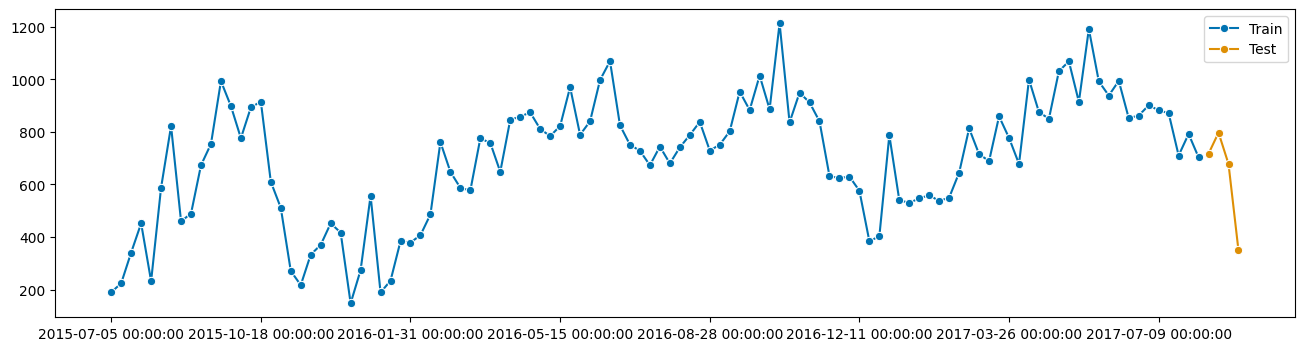

In [10]:
# Separamos train y test- test como esta por semanas quitamos 4

# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =df_w_r, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_df_w_r, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [11]:
# comprobamos cuanto tiempo adelante estamos prediciendo

# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4])

In [12]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [13]:
#  Auto ARIMA Model

# Nosotros ajustaremos el modelo con 52 temporadas que son las semanas que tiene un año
forecaster = AutoARIMA(sp=52, suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=52, suppress_warnings=True)

In [14]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  110
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                  -8.838
Date:                            Sat, 16 Dec 2023   AIC                             23.677
Time:                                    19:48:05   BIC                             31.751
Sample:                                07-05-2015   HQIC                            26.951
                                     - 08-06-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3977      0.064     -6.206      0.000      -0.523      -0.272
ma.S.L52       0.4927      0.258   

In [15]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

,IsCanceled
2017-08-13,6.521467
2017-08-20,6.658656
2017-08-27,6.581712
2017-09-03,6.536140


In [16]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

,IsCanceled
2017-08-13,679.574823
2017-08-20,779.502673
2017-08-27,721.774139
2017-09-03,689.619666


## Vamos a estudiar el rendimiento de nuestros modelos predictores

In [17]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [18]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

0.034348549259240385

In [19]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mean_absolute_percentage_error(y_test, np.exp(log_y_pred))

0.27867552356064845

In [20]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.3431963987794905

In [21]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

172.94849840703174

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

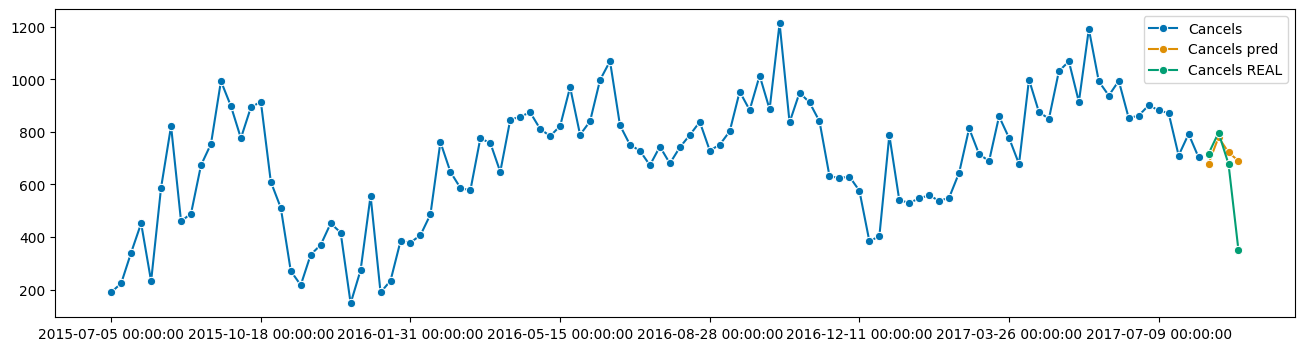

In [22]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

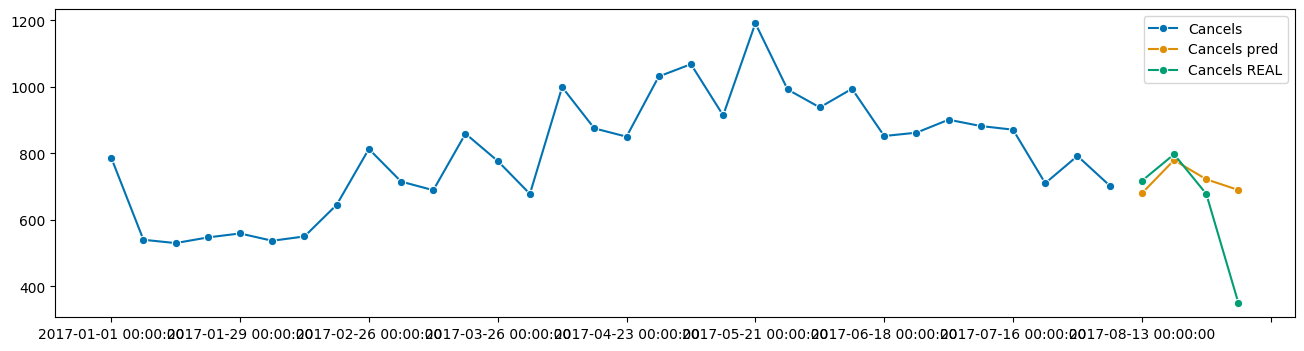

In [23]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2017 -
plot_series(y_train["2017":], np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])

---------

## Analisis Serie Cancelaciones

In [24]:
df_w_c = pd.read_csv('df_cancelaciones.csv')
df_w_c['ArrivalDate'] = pd.to_datetime(df_w_c['ArrivalDate'])
df_w_c = df_w_c.set_index('ArrivalDate')
df_w_c.tail()

,IsCanceled
ArrivalDate,
2017-08-06,251
2017-08-13,275
2017-08-20,332
2017-08-27,206
2017-09-03,101


In [25]:
log_df_w_c = pd.read_csv('df_cancelaciones_LOG.csv')
log_df_w_c['ArrivalDate'] = pd.to_datetime(log_df_w_c['ArrivalDate'])
log_df_w_c = log_df_w_c.set_index('ArrivalDate')
log_df_w_c.tail()

,IsCanceled
ArrivalDate,
2017-08-06,5.525453
2017-08-13,5.616771
2017-08-20,5.805135
2017-08-27,5.327876
2017-09-03,4.615121


110 4


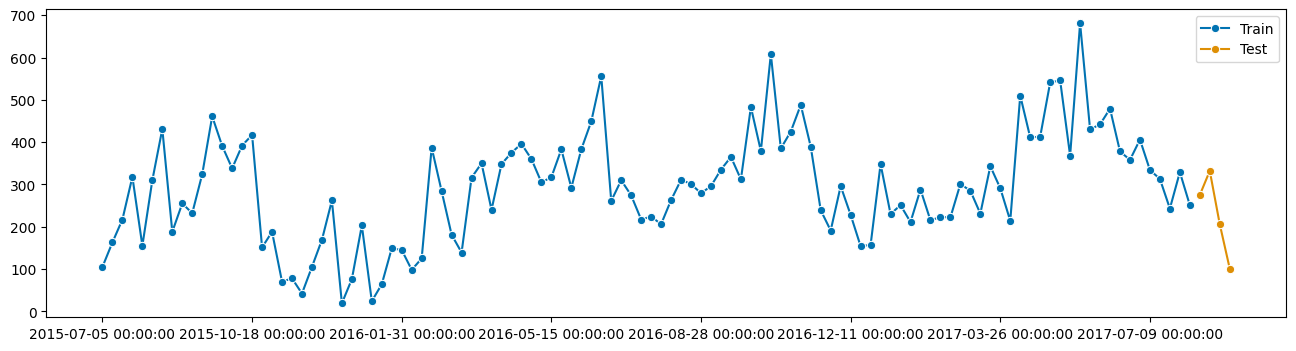

In [26]:
# Separamos train y test- test como esta por semanas quitamos 4

# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =df_w_c, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_df_w_c, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [27]:
# comprobamos cuanto tiempo adelante estamos prediciendo

# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4])

In [28]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [29]:
#  Auto ARIMA Model

# Nosotros ajustaremos el modelo con 52 temporadas que son las semanas que tiene un año
forecaster = AutoARIMA(sp=52, suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=52, suppress_warnings=True)

In [30]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  110
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                 -68.974
Date:                            Sat, 16 Dec 2023   AIC                            143.949
Time:                                    19:54:49   BIC                            152.023
Sample:                                07-05-2015   HQIC                           147.223
                                     - 08-06-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5920      0.067     -8.828      0.000      -0.723      -0.461
ma.S.L52       0.3322      0.197   

In [31]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

,IsCanceled
2017-08-13,5.673744
2017-08-20,5.744572
2017-08-27,5.689664
2017-09-03,5.718393


In [32]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

,IsCanceled
2017-08-13,291.122584
2017-08-20,312.489730
2017-08-27,295.794077
2017-09-03,304.415207


## Vamos a estudiar el rendimiento de nuestros modelos predictores

In [33]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [34]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

0.08188418112541054

In [35]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mean_absolute_percentage_error(y_test, np.exp(log_y_pred))

0.6418247442809591

In [36]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.5820251760684729

In [37]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

111.8942703763647

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

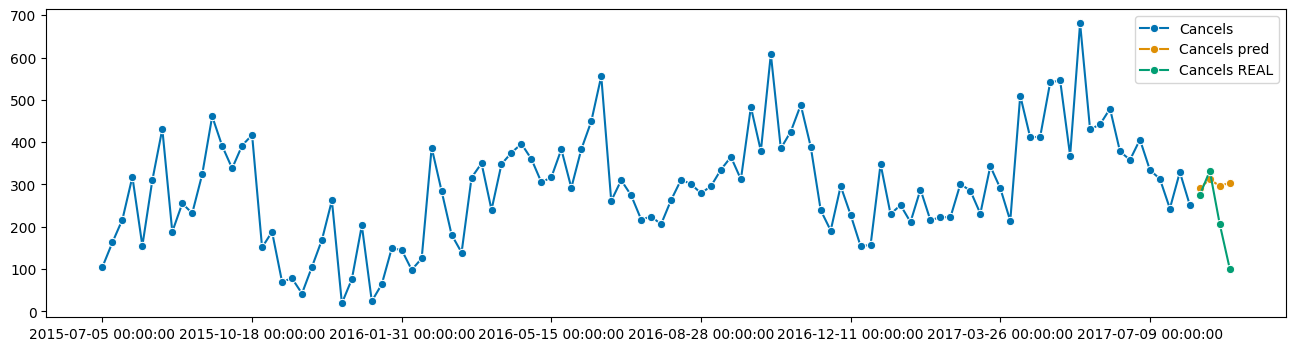

In [38]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

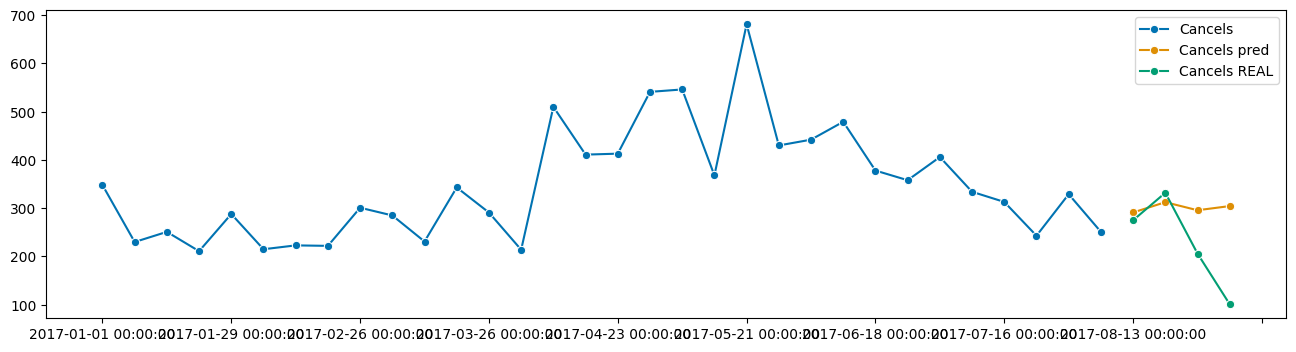

In [39]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2017 -
plot_series(y_train["2017":], np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])